First, load the package and install the dependencies (may take a while if this is run for the first time, and the dependencies aren't on the machine.)

In [1]:
using Pkg
pkg"activate .; instantiate; precompile"

Activating environment at `~/Research/packages/PerlaTonettiWaugh.jl/Project.toml`
Precompiling project...


And load the deps

In [2]:
using Plots, Parameters, BenchmarkTools, PerlaTonettiWaugh
gr(fmt = :png)

Plots.GRBackend()

## Stationary Solutions

First, define our common objects

In [3]:
params = parameters_simple()
settings = settings_simple()

(z_ex = [0.0, 0.005263157894736842, 0.010526315789473684, 0.015789473684210527, 0.021052631578947368, 0.02631578947368421, 0.031578947368421054, 0.03684210526315789, 0.042105263157894736, 0.04736842105263158  …  3.1052631578947367, 3.3157894736842106, 3.526315789473684, 3.736842105263158, 3.9473684210526314, 4.157894736842105, 4.368421052631579, 4.578947368421052, 4.7894736842105265, 5.0], T = 100.0, iterations = 1000, ts = 0.0:1.7543859649122806:100.0, stationary_x0 = PerlaTonettiWaugh.default_simple_stationary_x0, ode_solve_algorithm = Sundials.IDA{:Dense,Nothing,Nothing}(0, 0, 0, 0, 5, 7, 0.33, 3, 10, 0.0033, 5, 4, 10, 100, true, false, nothing, nothing, 0))

These work for both the dynamic problem (where the functions ``r`` and ``\pi`` are evaluated at each time point),
and the static one (where we work with ``r(T)`` and ``\pi(T)``.)

First, let's inspect the stationary solution:

g = 0.020727753490265812


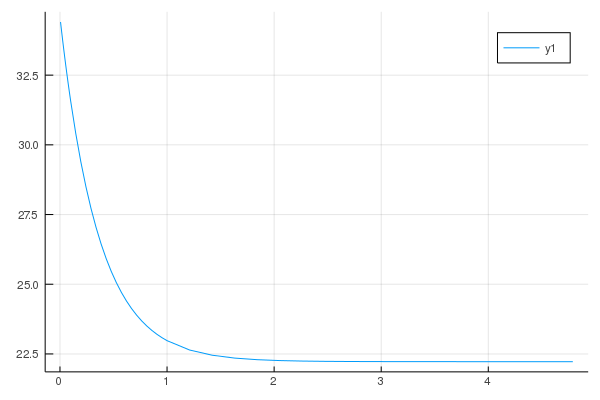

In [4]:
@unpack g, v = stationary_algebraic_simple(params, settings);
@show g; # algebraic growth rate
plot(settings.z_ex[2:end-1], v) # algebraic value function

The above is computed using an analytical expression from the paper (see equations 9, 10, and 11). We also have a numerical
method based on root-finding.

g = 0.02080684556397191


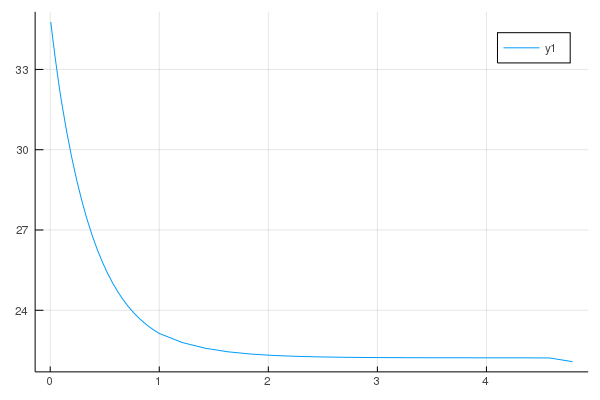

In [5]:
@unpack g, v = stationary_numerical_simple(params, settings);
@show g; # numerical growth rate
plot(settings.z_ex[2:end-1], v) # numerical value function

## Transition Dynamics

Let's add some movement to the parameters.

In [6]:
r = t -> (0.05 - 1e-02 * (1 - t / 100.0))

#3 (generic function with 1 method)

(As our default `T` is 100, and default `r` is a flat `t -> 0.05`, this doesn't change the stationary solution.)

To solve for the dynamics:

In [7]:
params = parameters_simple(r = r)

@unpack g_ts, v_ts, residuals = solve_simple_transition(params, settings)

(residuals = [4.121147867408581e-13, -2.4158453015843406e-13, -1.9895196601282805e-13, 2.2737367544323206e-13, 7.105427357601002e-14, -1.7053025658242404e-13, -1.4210854715202004e-14, 1.2789769243681803e-13, -4.263256414560601e-14, -7.105427357601002e-14  …  -1.4210854715202004e-14, 0.0, -1.4210854715202004e-14, -1.4210854715202004e-14, -1.4210854715202004e-14, -2.1316282072803006e-14, 0.0, -2.1316282072803006e-14, 7.105427357601002e-15, -7.105427357601002e-14], v_ts = [59.36755199628054 58.43552046576972 … 34.78282254035144 34.77247187858304; 59.05611121014623 58.1289937344011 … 34.601436062908995 34.5911500012666; … ; 26.673340909632852 26.557191949427118 … 22.220708312647446 22.217388798168994; 26.54766380361905 26.431442985833275 … 22.08239684057684 22.079011043079635], g_ts = [0.03197725012561891, 0.03174533612993638, 0.0315157924439041, 0.03128850823334464, 0.03106338055910259, 0.030840310770768986, 0.030619205755338812, 0.03039997915387376, 0.030182549666702467, 0.02996683989378

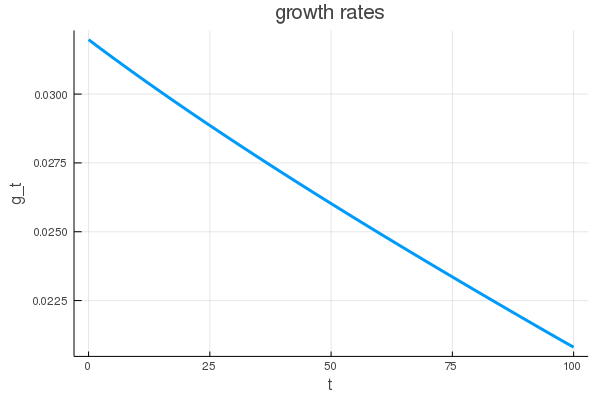

In [8]:
plot(settings.ts, g_ts, xlabel = "t", ylabel = "g_t", lw = 3, title = "growth rates", legend = false)

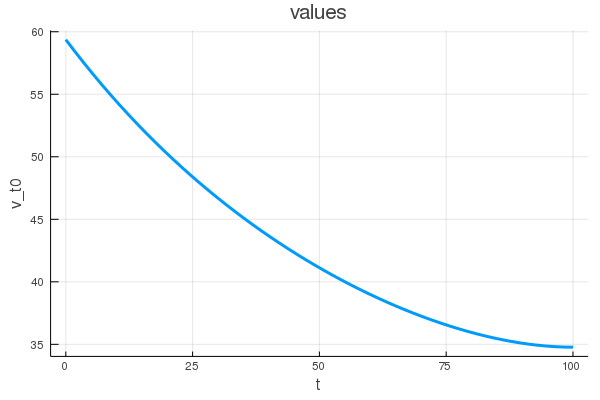

In [9]:
plot(settings.ts, v_ts[1, :], xlabel = "t", ylabel = "v_t0", lw = 3, title = "values", legend = false)

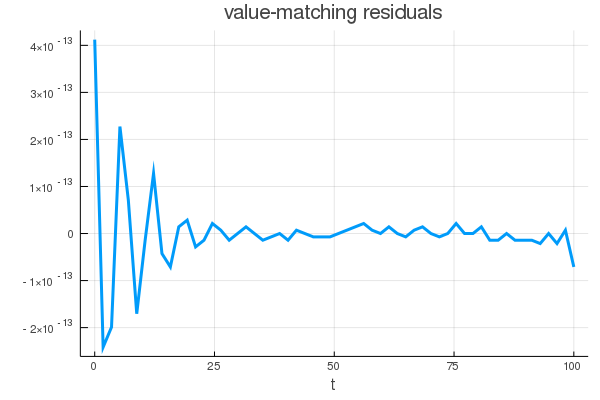

In [10]:
plot(settings.ts, residuals, xlabel = "t", lw = 3, title = "value-matching residuals", legend = false)